In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, LSTM
from keras.models import Sequential
import  yfinance as yf


In [ ]:
# ambil data
df = yf.download('BTC-USD', start='2023-01-01', end='2023-12-31')
# tampil data
df

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2023-01-01 00:00:00+00:00,16625.080078,16625.080078,16630.439453,16521.234375,16547.914062,9244361700
2023-01-02 00:00:00+00:00,16688.470703,16688.470703,16759.343750,16572.228516,16625.509766,12097775227
2023-01-03 00:00:00+00:00,16679.857422,16679.857422,16760.447266,16622.371094,16688.847656,13903079207
2023-01-04 00:00:00+00:00,16863.238281,16863.238281,16964.585938,16667.763672,16680.205078,18421743322
2023-01-05 00:00:00+00:00,16836.736328,16836.736328,16884.021484,16790.283203,16863.472656,13692758566
...,...,...,...,...,...,...
2023-12-26 00:00:00+00:00,42520.402344,42520.402344,43603.175781,41676.488281,43599.847656,30026850982
2023-12-27 00:00:00+00:00,43442.855469,43442.855469,43683.160156,42167.582031,42518.468750,25260941032


In [ ]:
df.shape

(364, 6)

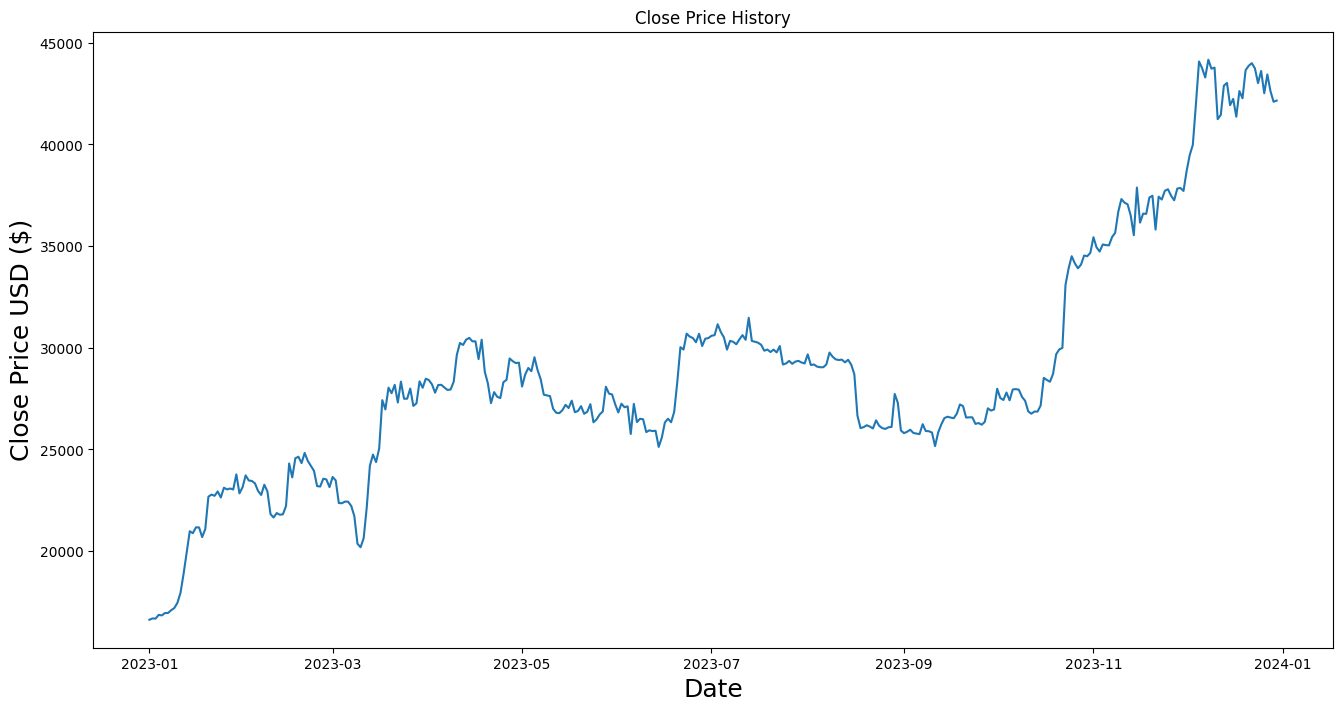

In [ ]:
#visualise data close
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# filter data hanya close saja
data = df['Close']
# konversi ke array numpy
datasets = data.values
# ambil panjang data training
train_data_len = math.ceil(len(datasets)*0.8)
train_data_len

292

In [ ]:
# scale data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(datasets)
scaled_data

array([[0.        ],
       [0.00230164],
       [0.0019889 ],
       [0.00864724],
       [0.00768499],
       [0.01186894],
       [0.01198184],
       [0.01692225],
       [0.02074957],
       [0.02981727],
       [0.04755788],
       [0.08149542],
       [0.11925609],
       [0.1579876 ],
       [0.1545201 ],
       [0.16500732],
       [0.16471274],
       [0.14754817],
       [0.16199951],
       [0.2197218 ],
       [0.22339161],
       [0.22131442],
       [0.22908508],
       [0.2182664 ],
       [0.23574512],
       [0.23265589],
       [0.23432433],
       [0.23259462],
       [0.25958937],
       [0.22566141],
       [0.23652299],
       [0.257745  ],
       [0.24859887],
       [0.24778015],
       [0.24351478],
       [0.22985607],
       [0.22275564],
       [0.24106188],
       [0.22926542],
       [0.18858649],
       [0.18249186],
       [0.1904686 ],
       [0.18746688],
       [0.18818937],
       [0.20317413],
       [0.27895197],
       [0.25410341],
       [0.288

In [ ]:
# melakukan training data scaled
train_data = scaled_data[0:train_data_len, :]
# membuat data training
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.        , 0.00230164, 0.0019889 , 0.00864724, 0.00768499,
       0.01186894, 0.01198184, 0.01692225, 0.02074957, 0.02981727,
       0.04755788, 0.08149542, 0.11925609, 0.1579876 , 0.1545201 ,
       0.16500732, 0.16471274, 0.14754817, 0.16199951, 0.2197218 ,
       0.22339161, 0.22131442, 0.22908508, 0.2182664 , 0.23574512,
       0.23265589, 0.23432433, 0.23259462, 0.25958937, 0.22566141,
       0.23652299, 0.257745  , 0.24859887, 0.24778015, 0.24351478,
       0.22985607, 0.22275564, 0.24106188, 0.22926542, 0.18858649,
       0.18249186, 0.1904686 , 0.18746688, 0.18818937, 0.20317413,
       0.27895197, 0.25410341, 0.28831092, 0.29105862, 0.27967091,
       0.29788   , 0.28361808, 0.27463129, 0.2658681 , 0.23865954,
       0.23783344, 0.25184276, 0.25045062, 0.23681602, 0.25494128])]
[0.24872942196154257]



In [ ]:
# konversi data x_train dan y_train ke arrays numpy
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# mereshape data untuk lstm

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(232, 60, 1)

In [ ]:
# bangun lstm model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# mengkompile data
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# melatih data hasil kompile
model.fit(x_train, y_train, batch_size=1, epochs=1)

232/232 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - loss: 0.0158


In [ ]:
# membuat testing data
test_data = scaled_data[train_data_len-60: , :]
# membuat dataset x dan y
x_test = []
y_test = datasets[train_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [ ]:
# konversi data ke arrays numpy
x_test = np.array(x_test)

In [ ]:
# mereshape data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# ambil prediksi data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step


In [ ]:
# ambil RMSE
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

4576.125813802083

<ipython-input-113-c86a553f2e94>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


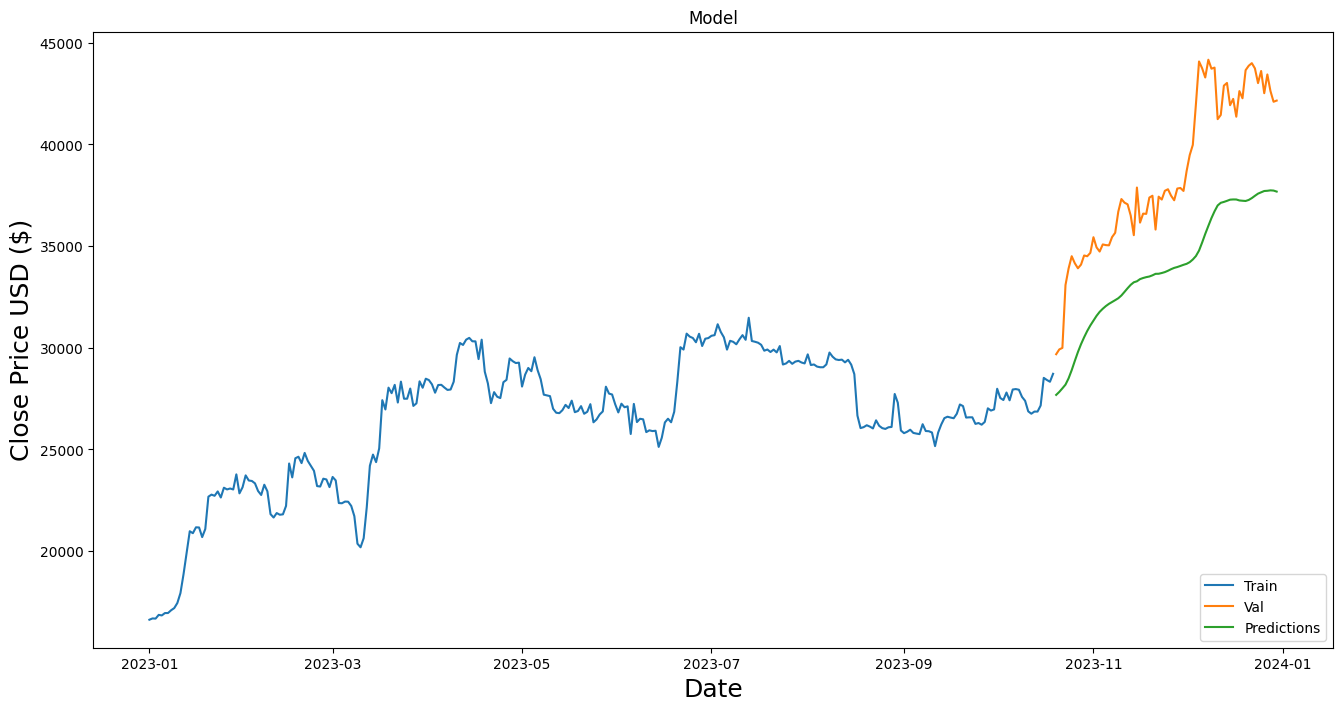

In [ ]:
# plot data
train = data[:train_data_len]
valid = data[train_data_len : train_data_len + len(predictions)]
valid['Predictions'] = predictions
close_column = 'BTC-USD'

#visualisasi data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

# Use the identified close_column for plotting
plt.plot(train[close_column])
plt.plot(valid[[close_column, 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

Ticker,BTC-USD,Predictions
Date,,
2023-10-20 00:00:00+00:00,29682.949219,27682.203125
2023-10-21 00:00:00+00:00,29918.412109,27829.421875
2023-10-22 00:00:00+00:00,29993.896484,28004.162109
2023-10-23 00:00:00+00:00,33086.234375,28186.605469
2023-10-24 00:00:00+00:00,33901.527344,28498.558594
...,...,...
2023-12-26 00:00:00+00:00,42520.402344,37709.734375
2023-12-27 00:00:00+00:00,43442.855469,37720.867188
2023-12-28 00:00:00+00:00,42627.855469,37741.917969


In [ ]:
# ambil btc
df = yf.download('BTC-USD', start='2023-01-01', end='2023-12-31')

# ambil kolom close
data = df['Close']

# ambil data 60 hari terakhir dan konvert ke numpy arrays
last_60_days = data[-60:].values

# Fit data dan reshape
scaler.fit(data.values.reshape(-1, 1))

# scale data
last_60_days_scaled = scaler.transform(last_60_days.reshape(-1, 1))

# bikin list kosong
X_test = []

# append data ke list
X_test.append(last_60_days_scaled)

# konversi ke numpy arrays
X_test = np.array(X_test)

# reshape data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# ambil prediksi
pred_price = model.predict(X_test)

# undo scalling data
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[37615.973]]


In [ ]:
# harga asli
df = yf.download('BTC-USD', start='2023-12-31', end='2024-12-01')
df.head(1)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2023-12-31 00:00:00+00:00,42265.1875,42265.1875,42860.9375,41998.253906,42152.097656,16397498810
